## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.


Basically each of the last three variables is the equivalent of seconds, minutes and hours of a clock. The clock goes on and each time a muon passes you take the time. 
NOTICE: if you take random measures, you end up with a uniform distribution in the interval of measure. 
It's hence useful to plot an istogram. You'll get how many seconds are in a minute and so on..

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
!curl -O https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   123  100   123    0     0    270      0 --:--:-- --:--:-- --:--:--   273


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [28]:
import numpy as np
import pandas as pd

# Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

df = pd.read_csv("data_000637.txt", delimiter=",") #this is if the file is comma separated (if it was tab separated would be \t)
n_rows = len(df[:])
N = 11000 #just picking a number higher than 10 thousand and lower than the maximum read from the last print
#print(n_rows)
Nrow_data = df.head(N) #head makes a copy! So I can save it somewhere
Nrow_data #just showing the shorter data frame


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10995,1,0,139,3869200277,204,0
10996,1,0,61,3869200277,202,20
10997,1,0,63,3869200277,204,1
10998,1,0,59,3869200277,283,29


Number of BX in an ORBIT: 3563


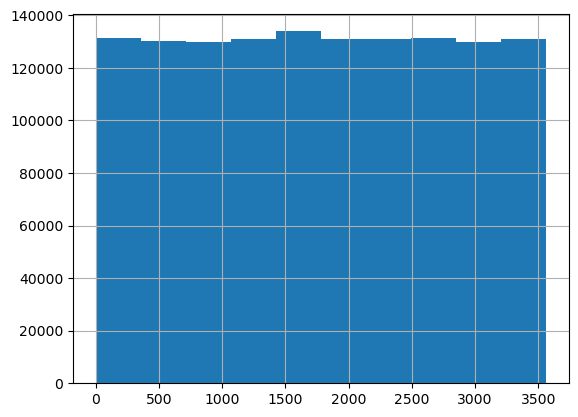

In [31]:
#Find out the number of BX in a ORBIT (the value 'x').
df['BX_COUNTER'].hist()
x = max(df['BX_COUNTER'])
print("Number of BX in an ORBIT:", x) 

Not alll the orbits are the same, but if I plot the BX_COUNTER values as an histogram, I get that they are all included in a certain interval. 
This interval tells me the how they are distributed hence what is the max value of BX_COUNTER (then it resets and increases the higher unit, here orbit). 
SO BASICALLY ORBIT is what would stand for hours!! In each there's x BX_COUNTER (would be someting like minutes), and for each BX_COUNTER I have a certain amount of TDCs (namely 30). 

total time for data taking in ns: 980181300
total time for data taking in scientific notation 9.80e+08 ns


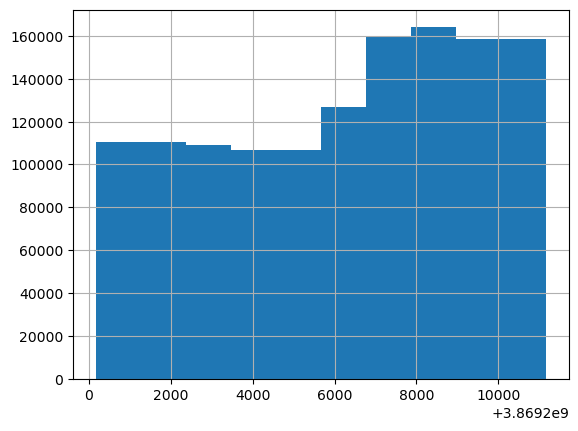

In [50]:
#Find out how much the data taking lasted. 
#You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

df['ORBIT_CNT'].hist() #This gives you an idea of "hours" measured 
total_time = (max(df['ORBIT_CNT'])-min(df['ORBIT_CNT']))*x*25 #I have 25 nanoseconds for each BX AND x BX in an ORBIT. 
print("total time for data taking in ns:", total_time)
print("total time for data taking in scientific notation", f"{total_time:.2e}", "ns")

In general I would need to sum up the number of nano-seconds in each unit. Kind of like: I now how many nanoseconds are in seconds, I add the number of nanoseconds in minutes plus the number of nanoseconds in the amount of hours measured. 
However, here I don't have a precise stopping. Or anyways, the amount of nanoseconds I have I so large that +-1 doesn't matter. Moreover, since I have pretty much all values in each smaller interval, what I really care about is only the maximum hour I measured (+1 but as said, doesn't really matter) - minimum. 

In [49]:
#Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).
df['abs_time'] = df['ORBIT_CNT']*x*25 + df['BX_COUNTER']*25 + df['TDC_MEAS']*(25/30)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


In [55]:
#Replace the values (all 1) of the HEAD column randomly with 0 or 1.
import numpy.random as rnd

df.loc[:,'HEAD'] = rnd.choice([0,1], size = len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,0,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


In [56]:
#Create a new DataFrame that contains only the rows with HEAD=1.
df[df['HEAD'] == 1]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
8,1,0,62,3869200167,2774,21,3.446490e+14
10,1,1,7,3869200167,2785,4,3.446490e+14
...,...,...,...,...,...,...,...
1310712,1,1,35,3869211171,429,4,3.446500e+14
1310713,1,0,64,3869211171,758,18,3.446500e+14
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14


     FPGA  TDC_CHANNEL  Counts
0       0            1    1215
1       0            2    1602
2       0            3    1493
3       0            4    2352
4       0            5    1432
..    ...          ...     ...
251     1          129      35
252     1          130      38
253     1          137      36
254     1          138      36
255     1          139   32442

[256 rows x 3 columns]


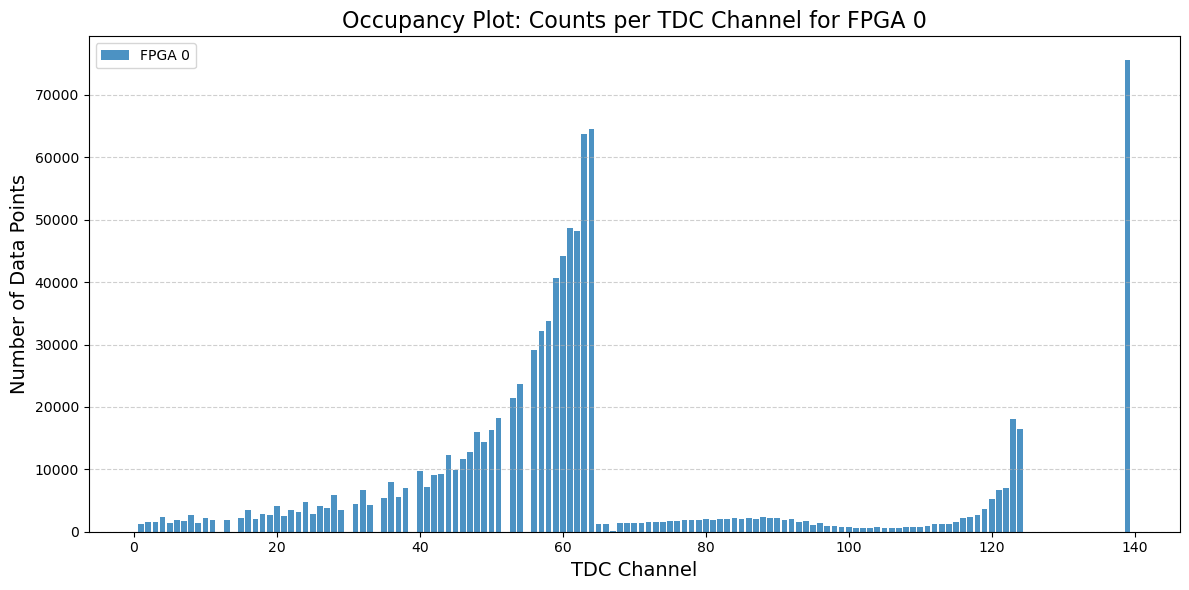

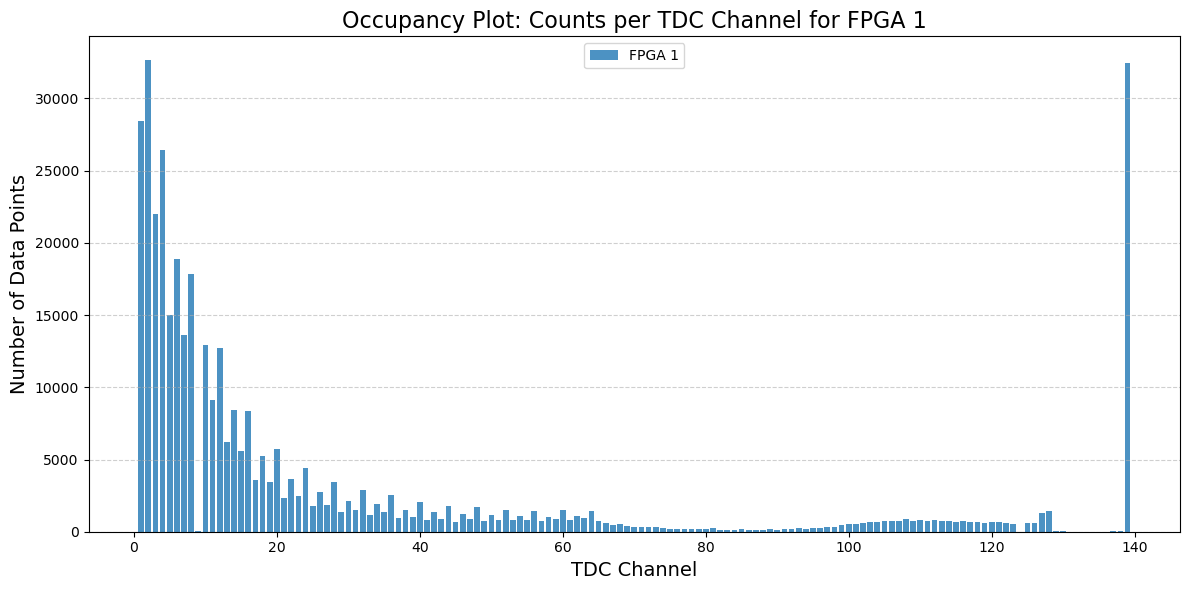

In [77]:
#Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
import matplotlib.pyplot as plt

#Let's first have a quick idea of how groupby works
#channels = df.groupby('TDC_CHANNEL')
#for channel_idx, channel in channels: 
#    print(f"Channel:{channel_idx}")
#    print(channel)
    
# Group by FPGA and TDC_CHANNEL, then calculate the size for each group
grouped = df.groupby(['FPGA', 'TDC_CHANNEL']).size().reset_index(name='Counts') #Adds a new column Counts for the size of each group.
print(grouped)

# Separate data for each FPGA
for fpga_id in grouped['FPGA'].unique(): #Filters the data for each unique FPGA value.
    fpga_data = grouped[grouped['FPGA'] == fpga_id]
    
    # Plot for the current FPGA
    plt.figure(figsize=(12, 6))
    plt.bar(fpga_data['TDC_CHANNEL'], fpga_data['Counts'], alpha=0.8, label=f'FPGA {fpga_id}') #Creates a separate bar chart for each FPGA.
    plt.title(f'Occupancy Plot: Counts per TDC Channel for FPGA {fpga_id}', fontsize=16)
    plt.xlabel('TDC Channel', fontsize=14)
    plt.ylabel('Number of Data Points', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [78]:
#Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

# Group by TDC_CHANNEL and calculate the size for each group
channel_counts = df.groupby('TDC_CHANNEL').size()

# Sort the counts in descending order and get the top 3 noisy channels
top_noisy_channels = channel_counts.sort_values(ascending=False).head(3)

# Display the top 3 noisy channels
print("Top 3 Noisy TDC Channels:")
print(top_noisy_channels)


Top 3 Noisy TDC Channels:
TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64


In [82]:
# Let's first count the number of unique orbits

number_orbits = len(df['ORBIT_CNT'].unique())
print(f"There are {number_orbits} different orbits")

# Let's now count the mumber of orbits with at least one measurement from TDC_CHANNEL = 139
ok_orbits = 0
for idx, orbit in df.groupby('ORBIT_CNT'):
    for channel in orbit['TDC_CHANNEL'].unique(): 
        if channel == 139: 
            ok_orbits+=1

print(f"There are {ok_orbits} of different orbits that contain at least one measurement from TDC_CHANNEL = 139")

Number of unique orbits: 11001
Number of total orbits: 1310720
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 10976
